# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Use citipy to find city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# api url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# List of city data
city_data = []

record = 0

# build city search query
for city in cities:
    city_url = url + "&q=" + city

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        record += 1 # Increment after successful entry
        
        print(f'Processing record #{record} of {len(cities)} | {city}' )
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        

Processing record #1 of 613 | luderitz
City not found. Skipping...
Processing record #2 of 613 | liku
Processing record #3 of 613 | hermanus
Processing record #4 of 613 | vaini
Processing record #5 of 613 | provideniya
Processing record #6 of 613 | kaitangata
Processing record #7 of 613 | chuy
Processing record #8 of 613 | butaritari
Processing record #9 of 613 | netivot
Processing record #10 of 613 | nome
Processing record #11 of 613 | faanui
Processing record #12 of 613 | itoman
Processing record #13 of 613 | thompson
Processing record #14 of 613 | murdochville
Processing record #15 of 613 | padang
Processing record #16 of 613 | kirgiz-miyaki
Processing record #17 of 613 | koungou
Processing record #18 of 613 | pacific grove
Processing record #19 of 613 | taltal
Processing record #20 of 613 | yulara
Processing record #21 of 613 | viedma
Processing record #22 of 613 | lima
Processing record #23 of 613 | georgetown
City not found. Skipping...
Processing record #24 of 613 | jamestown
Pr

Processing record #192 of 613 | mirabad
Processing record #193 of 613 | lovozero
Processing record #194 of 613 | dunmore town
Processing record #195 of 613 | aswan
City not found. Skipping...
Processing record #196 of 613 | mocuba
City not found. Skipping...
Processing record #197 of 613 | ejido
Processing record #198 of 613 | ginir
Processing record #199 of 613 | porbandar
Processing record #200 of 613 | karagaylinskiy
Processing record #201 of 613 | vardo
City not found. Skipping...
Processing record #202 of 613 | bridlington
Processing record #203 of 613 | trelew
Processing record #204 of 613 | rey bouba
Processing record #205 of 613 | uitenhage
Processing record #206 of 613 | sabha
Processing record #207 of 613 | longyearbyen
Processing record #208 of 613 | peto
Processing record #209 of 613 | abu dhabi
Processing record #210 of 613 | eirunepe
Processing record #211 of 613 | bengkulu
Processing record #212 of 613 | tomatlan
Processing record #213 of 613 | el alto
Processing record 

Processing record #379 of 613 | ostrovnoy
Processing record #380 of 613 | alvand
Processing record #381 of 613 | urengoy
Processing record #382 of 613 | iqaluit
City not found. Skipping...
Processing record #383 of 613 | hoquiam
Processing record #384 of 613 | pevek
Processing record #385 of 613 | kosh-agach
Processing record #386 of 613 | martapura
Processing record #387 of 613 | hofn
City not found. Skipping...
Processing record #388 of 613 | santa rosa de viterbo
Processing record #389 of 613 | kalabo
Processing record #390 of 613 | bathsheba
Processing record #391 of 613 | qaqortoq
Processing record #392 of 613 | lerwick
Processing record #393 of 613 | saint-augustin
Processing record #394 of 613 | sechura
Processing record #395 of 613 | malakal
Processing record #396 of 613 | alipur chatha
Processing record #397 of 613 | balabac
City not found. Skipping...
City not found. Skipping...
Processing record #398 of 613 | ust-tsilma
Processing record #399 of 613 | ascension
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
len(city_data)
city_data_df = pd.DataFrame(city_data)
print(city_data_df.head())
city_data_df.to_csv(output_data_file, index_label="City_ID")

          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0     luderitz -26.6481   15.1594     73.98        46           0       10.20   
1         liku  -0.7275  119.8922     78.22        80          82        4.43   
2     hermanus -34.4187   19.2345     78.01        43           0       10.45   
3        vaini -21.2000 -175.2000     77.00        78          20       10.36   
4  provideniya  64.3833 -173.3000    -10.68        85          47        2.68   

  Country        Date  
0      NA  1613988724  
1      ID  1613988724  
2      ZA  1613988724  
3      TO  1613988724  
4      RU  1613988724  


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index # find incicies of city_data with humidity > 100

In [115]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(humid_city_data, inplace=False)
clean_city_data_df.describe()
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,73.98,46,0,10.20,NA,1613988724
1,liku,-0.7275,119.8922,78.22,80,82,4.43,ID,1613988724
2,hermanus,-34.4187,19.2345,78.01,43,0,10.45,ZA,1613988724
3,vaini,-21.2000,-175.2000,77.00,78,20,10.36,TO,1613988724
4,provideniya,64.3833,-173.3000,-10.68,85,47,2.68,RU,1613988724


In [116]:
# Update .csv with cleaned city_data
clean_city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

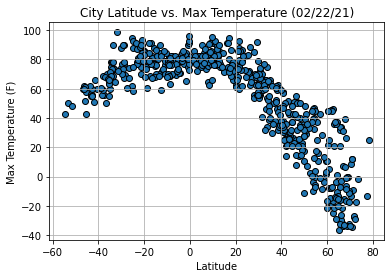

In [11]:
# Build scatter plot
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Max Temp"],
            edgecolor="black", marker="o")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save
plt.savefig("output_data/lat-temp-plot.png")

# Show plot
plt.show()

Analysis: Cities closer to the equator (latitude 0) have higher max temperatures. Max temperatures fall dramatically above latitude 40. There are more cities above latitude 40 than below latitude 40, otherwise we might see a similar drop in max temperature below latitude -40. Sunlight is more concentrated around the equator than away from it.

## Latitude vs. Humidity Plot

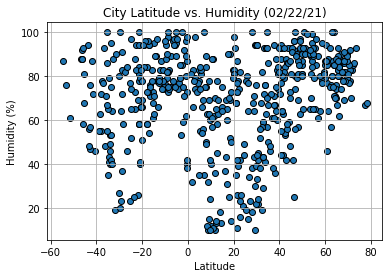

In [13]:
# Build Latitude and Humidity scatterplot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# add title and labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save
plt.savefig("output_data/latitude-humidity.png")
plt.show()

Analysis: There is weak correlation between a city's latitude and humidity. A reason to explain this might be that a more normal amount of water (which is the main factor in humidity) is present around all cities. The amount of sunlight a city recieves is much more variable than the amount of water present in a city.

## Latitude vs. Cloudiness Plot

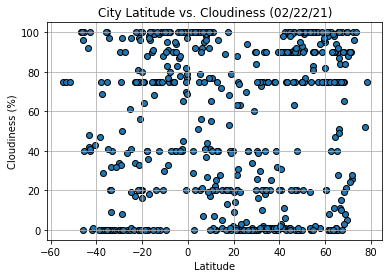

In [15]:
# Build Latitude and Humidity scatterplot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# add title and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# save
plt.savefig("output_data/latitude-cloudiness.png")
plt.show()

Analysis: There is no significant relationship between city latitude and city cloudiness. Data is clusted around certain cloudiness percentages. Perhaps cities near each other experience the same passing clouds with the same cloudiness.

## Latitude vs. Wind Speed Plot

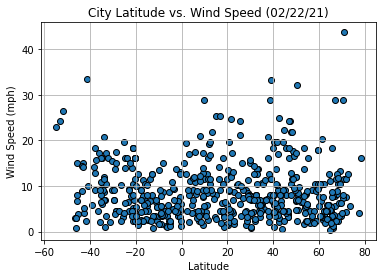

In [17]:
# Build Latitude and Humidity scatterplot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# add title and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save
plt.savefig("output_data/latitude-windspeed.png")
plt.show()

Analysis: The data is fairly normal, meaning that there is no significant relationship between city latitude and city wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

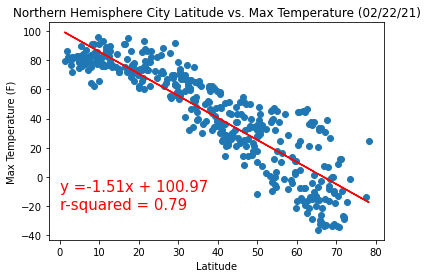

In [103]:
# Define x, y values
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add annotation
plt.annotate(line_eq,(0,-10), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(0,-22),fontsize=15,color="red")

plt.savefig("output_data/northern-hemi-latitude-temp.png")
plt.show()

Analysis: In the Northern Hemisphere, a city's latitude and its max temperature correlate at -1.51x.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

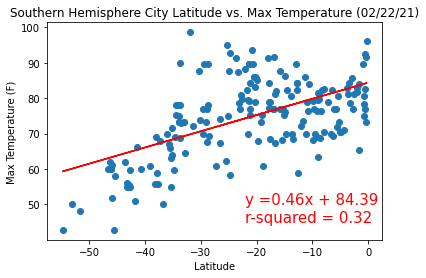

In [104]:
# Define x, y values
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add annotation
plt.annotate(line_eq,(-22,50), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(-22,45),fontsize=15,color="red")

plt.savefig("output_data/southern-hemi-latitude-temp.png")
plt.show()

Analysis: In the Southern Hemisphere, a city's latitude and its max temperature correlate positively at 0.46x. In the Southern Hemisphere, the higher a city's latitude is, the higher its max temperature will be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

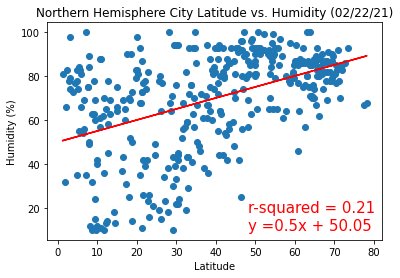

In [105]:
# Define x, y values
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Northern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add annotation
plt.annotate(line_eq,(48,10), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(48,18),fontsize=15,color="red")

plt.savefig("output_data/northern-hemi-latitude-humidity.png")
plt.show()

Analysis: r-squared is 0.21

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

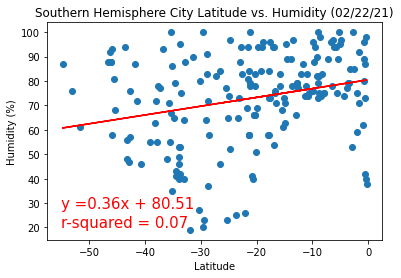

In [106]:
# Define x, y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Southern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add annotation
plt.annotate(line_eq,(-55,28), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(-55,20),fontsize=15,color="red")

plt.savefig("output_data/southern-hemi-latitude-humidity.png")
plt.show()

Analysis: r-squared is 0.07

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

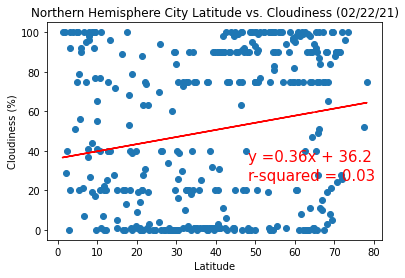

In [108]:
# Define x, y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add annotation
plt.annotate(line_eq,(48,35), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(48,25),fontsize=15,color="red")

plt.savefig("output_data/northern-hemi-latitude-cloudiness.png")
plt.show()

Analysis: r-squared is 0.03

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

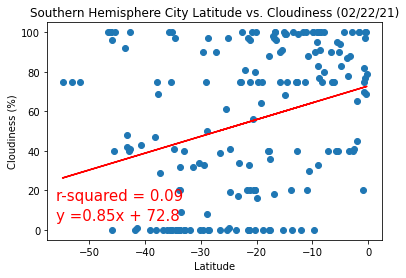

In [109]:
# Define x, y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add annotation
plt.annotate(line_eq,(-56,5), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(-56,15),fontsize=15,color="red")

plt.savefig("output_data/southern-hemi-latitude-cloudiness.png")
plt.show()

Analysis: r-squared is 0.09

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

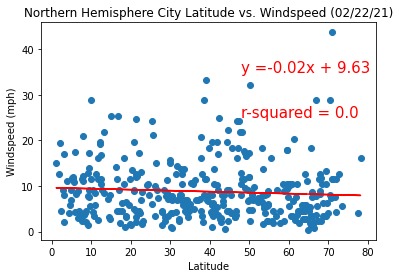

In [110]:
# Define x, y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Northern Hemisphere City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# add annotation
plt.annotate(line_eq,(48,35), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(48,25),fontsize=15,color="red")

plt.savefig("output_data/northern-hemi-latitude-windspeed.png")
plt.show()

Analysis: r-squared is 0.0

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

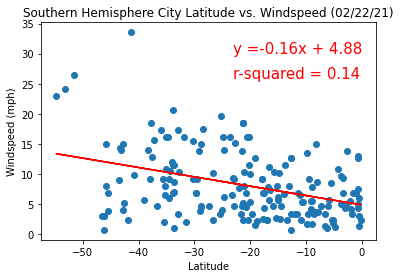

In [111]:
# Define x, y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept

# calculate r-squared
rsquared = round(rvalue**2,2)

# line equation y = mx + b
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot
plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values, regress_values, "r-")

# add title and labels
plt.title("Southern Hemisphere City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# add annotation
plt.annotate(line_eq,(-23,30), fontsize=15, color="red")
plt.annotate(f"r-squared = {rsquared}",(-23,26),fontsize=15,color="red")

plt.savefig("output_data/southern-hemi-latitude-windspeed.png")
plt.show()

Analysis: r-squared is 0.14